# <span style="color:red">Task 5: PCOS Prediction </span> 

# <span style="color:purple">Introduction </span>

## <span style="color:purple">1. Introduction (Project Overview) </span>

**Polycystic Ovary Syndrome (PCOS)** is a common endocrine disorder among women of reproductive age, characterized by a range of symptoms including menstrual irregularity, hyperandrogenism, and polycystic ovaries. Early and accurate diagnosis is crucial for managing the condition and mitigating long-term health risks. This project aims to develop and evaluate machine learning models, specifically Decision Trees, to predict the likelihood of a PCOS diagnosis based on readily available clinical features. We will explore the effectiveness of a baseline Decision Tree, a pre-pruned tree, and a hyperparameter-tuned tree using a relevant dataset. The goal is to build a model that can assist in preliminary screening or risk assessment for PCOS.

## <span style="color:purple">2. Introduction to Chosen Techniques (Decision Trees) </span>

**Decision Trees** are a type of supervised machine learning algorithm used for both classification and regression tasks. For classification, as in this project, the tree predicts the class label of a target variable.

*   **How they work:** Decision Trees work by recursively partitioning the data into smaller subsets based on the values of input features. At each node of the tree, a specific feature is tested against a threshold (for numerical features) or a value (for categorical features). The split is chosen to maximize the purity (or minimize the impurity) of the resulting child nodes, typically using metrics like the **Gini impurity** or **Entropy (Information Gain)**. This process continues until a stopping criterion is met, such as reaching a maximum depth, having a minimum number of samples in a node, or achieving pure nodes (nodes containing samples of only one class). The terminal nodes, called leaves, contain the final class predictions.
*   **Advantages:**
    *   **Interpretability:** Decision trees are relatively easy to understand and visualize. The path from the root to a leaf represents a sequence of decisions leading to a prediction.
    *   **Handles Non-linear Data:** They can capture non-linear relationships between features and the target.
    *   **Requires Less Data Preprocessing:** They often don't require feature scaling (like standardization or normalization) and can handle both numerical and categorical data (though scikit-learn requires numerical input).
*   **Disadvantages:**
    *   **Overfitting:** Decision trees, especially deep ones, are prone to overfitting the training data, leading to poor generalization on unseen data. Techniques like pruning and setting constraints (e.g., `max_depth`) are used to mitigate this.
    *   **Instability:** Small variations in the data can result in a completely different tree structure. Ensemble methods like Random Forests and Gradient Boosting are often used to improve stability and accuracy.
    *   **Bias towards features with more levels:** Features with many levels or values might be favored by impurity measures like Gini or Entropy.

In this project, we will use Decision Trees because of their interpretability, which can be valuable in a medical context, and explore methods (pruning, hyperparameter tuning) to address their tendency to overfit.

## <span style="color:purple">3. Introduction of the Dataset </span>

The dataset used in this project is `pcos_dataset.csv`. It contains clinical information potentially relevant to the diagnosis of Polycystic Ovary Syndrome (PCOS).

*   **Purpose:** To provide features that can be used to train a machine learning model for PCOS prediction.
*   **Features (Columns):**
    *   `Age`: Patient's age (Numerical).
    *   `BMI`: Body Mass Index (Numerical).
    *   `Menstrual_Irregularity`: Indicator of irregular menstrual cycles (Binary: 1 for irregular, 0 for regular).
    *   `Testosterone_Level(ng/dL)`: Level of testosterone hormone (Numerical).
    *   `Antral_Follicle_Count`: Count of antral follicles observed via ultrasound (Numerical).
*   **Target Variable:**
    *   `PCOS_Diagnosis`: Indicates whether the patient was diagnosed with PCOS (Binary: 1 for Yes, 0 for No). This is the variable our model aims to predict.
*   **Size:** The dataset contains 1000 entries (rows) and 6 columns.
*   **Data Types:** The dataset consists primarily of numerical data, with `Menstrual_Irregularity` and `PCOS_Diagnosis` being binary indicators represented numerically (0 or 1).

Initial exploration (using `.info()` and `.describe()` in the code below) will confirm data types and check for missing values. Visualizations will help understand the distributions and relationships within the data.

## <span style="color:purple">4. Input Encoding / Input Representation</span>

**How and Why?**

Before feeding the data into the Decision Tree model, some preprocessing steps are necessary.

1.  **Separating Features (X) and Target (y):**
    *   The dataset is split into features (the independent variables used for prediction) and the target variable (the dependent variable we want to predict).
    *   `X` will contain all columns except `PCOS_Diagnosis`.
    *   `y` will contain only the `PCOS_Diagnosis` column.
    *   **Why:** This separation is fundamental for supervised learning, where the model learns a mapping from `X` to `y`.

2.  **Handling Categorical Features (Encoding):**
    *   Decision tree algorithms in `scikit-learn` primarily work with numerical data. If there were categorical features (e.g., text labels), they would need to be converted into a numerical format (e.g., using One-Hot Encoding or Label Encoding).
    *   **Observation:** In this specific dataset (`pcos_dataset.csv`), all columns (`Age`, `BMI`, `Menstrual_Irregularity`, `Testosterone_Level(ng/dL)`, `Antral_Follicle_Count`) appear to be numerical already. `Menstrual_Irregularity` is binary (0/1), which is a valid numerical representation suitable for the model.
    *   **Action:** Therefore, no explicit categorical encoding is required for this dataset based on the initial inspection.

3.  **Feature Scaling:**
    *   Some machine learning algorithms (like SVMs, Logistic Regression, Neural Networks) are sensitive to the scale of features. Decision Trees are generally *less* sensitive because their splitting logic depends on thresholds rather than distances. Scaling is typically not strictly necessary for basic decision trees.
    *   **Action:** For simplicity and to focus on the core decision tree implementation, feature scaling (e.g., using `StandardScaler` or `MinMaxScaler`) will not be applied in this baseline model. If performance is poor or if comparing with scale-sensitive models, scaling could be revisited.

4.  **Splitting Data into Training and Testing Sets:**
    *   The dataset is divided into two subsets: a training set and a testing set.
    *   The model learns the patterns from the **training set**.
    *   The model's performance is evaluated on the unseen **testing set** to estimate its generalization ability on new data.
    *   A common split ratio is 70-80% for training and 20-30% for testing. We will use an 80/20 split.
    *   Setting a `random_state` ensures that the split is the same every time the code is run, making the results reproducible.
    *   **Why:** This prevents the model from being evaluated on the same data it was trained on, which would lead to an overly optimistic performance estimate. It helps assess how well the model generalizes.

## <span style="color:purple">5. Coding for the Implementation with Comments</span>

In [254]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [256]:
#defining a method to calculate the metrics
def evaluate_model(y_test, y_pred):
  # 1. Calculate Evaluation Metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred) 
  recall = recall_score(y_test, y_pred)       
  f1 = f1_score(y_test, y_pred) 
  # 2. Printing the metrics:
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")

### Explaining terminologies

**Evaluation Metrics:**

*   **Accuracy:** The proportion of correctly classified instances (both PCOS positive and negative) out of the total instances in the test set. While simple, it can be misleading if the dataset is imbalanced.

*   **Confusion Matrix:** A table that summarizes the performance of a classification model. It shows:
    *   True Positives (TP): Correctly predicted positive cases (Predicted PCOS, Actual PCOS).
    *   True Negatives (TN): Correctly predicted negative cases (Predicted No PCOS, Actual No PCOS).
    *   False Positives (FP): Incorrectly predicted positive cases (Predicted PCOS, Actual No PCOS) - Type I Error.
    *   False Negatives (FN): Incorrectly predicted negative cases (Predicted No PCOS, Actual PCOS) - Type II Error.

*   **Classification Report:** Provides key metrics per class:
    *   **Precision:** TP / (TP + FP) - Of all instances predicted as positive, how many were actually positive? Measures prediction accuracy for the positive class.
    *   **Recall (Sensitivity):** TP / (TP + FN) - Of all actual positive instances, how many were correctly identified? Measures the model's ability to find all positive cases.
    *   **F1-Score:** 2 * (Precision * Recall) / (Precision + Recall) - The harmonic mean of precision and recall, providing a single score balancing both.

### 1. Initial Data Loading & Exploration

In [109]:
# Reading the dataset
dataset = pd.read_csv("pcos_dataset.csv")

In [38]:
dataset.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [40]:
#Size of the dataset
dataset.shape

(1000, 6)

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


This shows that the dataset is clean with no null values. All the features are also in thier respective datatype.

In [83]:
dataset['Menstrual_Irregularity'].unique()

array([1, 0])

In [89]:
dataset['PCOS_Diagnosis'].unique()

array([0, 1])

These are the features with unique values.

In [45]:
dataset.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


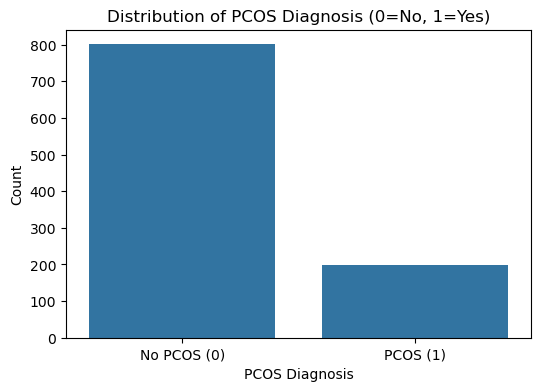

Value Counts for PCOS Diagnosis:
PCOS_Diagnosis
0    0.801
1    0.199
Name: proportion, dtype: float64


In [115]:
# Visualization 1: Distribution of the Target Variable (PCOS Diagnosis)
plt.figure(figsize=(6, 4))
sns.countplot(x='PCOS_Diagnosis', data=dataset)
plt.title('Distribution of PCOS Diagnosis (0=No, 1=Yes)')
plt.xlabel('PCOS Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['No PCOS (0)', 'PCOS (1)'])
plt.show()
print(f"Value Counts for PCOS Diagnosis:\n{dataset['PCOS_Diagnosis'].value_counts(normalize=True)}")

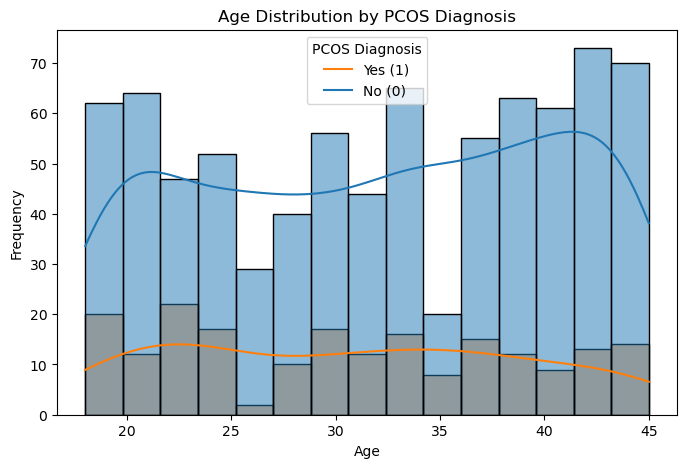

In [117]:
# Visualization 2: Age Distribution by PCOS Diagnosis
plt.figure(figsize=(8, 5))
sns.histplot(data=dataset, x='Age', hue='PCOS_Diagnosis', kde=True, bins=15)
plt.title('Age Distribution by PCOS Diagnosis')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='PCOS Diagnosis', labels=['Yes (1)', 'No (0)'])
plt.show()

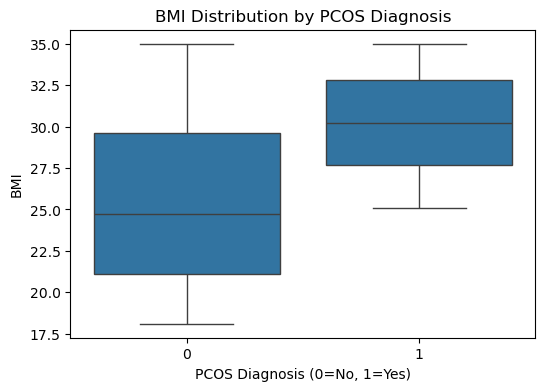

In [121]:
# Visualization 3: BMI Distribution by PCOS Diagnosis
plt.figure(figsize=(6, 4))
sns.boxplot(x='PCOS_Diagnosis', y='BMI', data=dataset)
plt.title('BMI Distribution by PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()

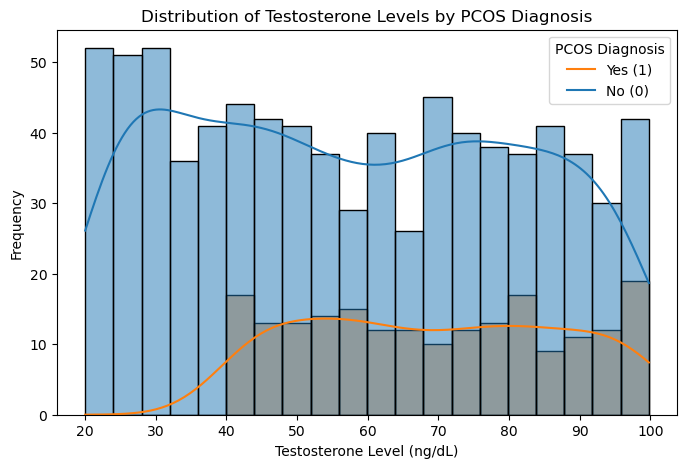

In [125]:
# Visualization 4: Testosterone Level Distribution by PCOS Diagnosis
plt.figure(figsize=(8, 5))
sns.histplot(data=dataset, x='Testosterone_Level(ng/dL)', hue='PCOS_Diagnosis', kde=True, bins=20)
plt.title('Distribution of Testosterone Levels by PCOS Diagnosis')
plt.xlabel('Testosterone Level (ng/dL)')
plt.ylabel('Frequency')
plt.legend(title='PCOS Diagnosis', labels=['Yes (1)', 'No (0)'])
plt.show()

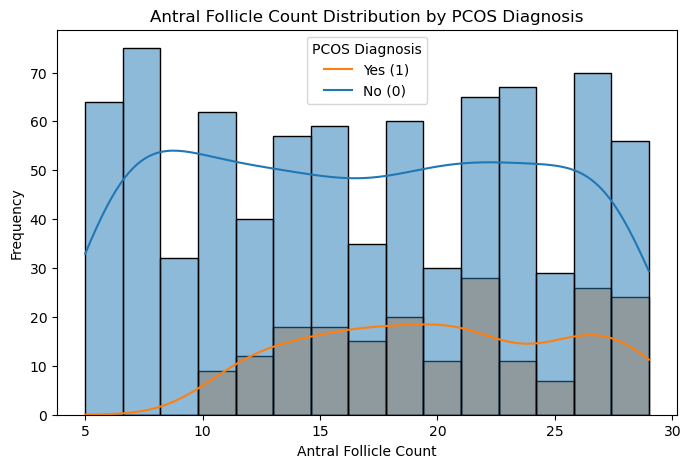

In [129]:
# Visualization 5: Antral Follicle Count Distribution by PCOS Diagnosis
plt.figure(figsize=(8, 5))
sns.histplot(data=dataset, x='Antral_Follicle_Count', hue='PCOS_Diagnosis', kde=True, bins=15)
plt.title('Antral Follicle Count Distribution by PCOS Diagnosis')
plt.xlabel('Antral Follicle Count')
plt.ylabel('Frequency')
plt.legend(title='PCOS Diagnosis', labels=['Yes (1)', 'No (0)']) 
plt.show()

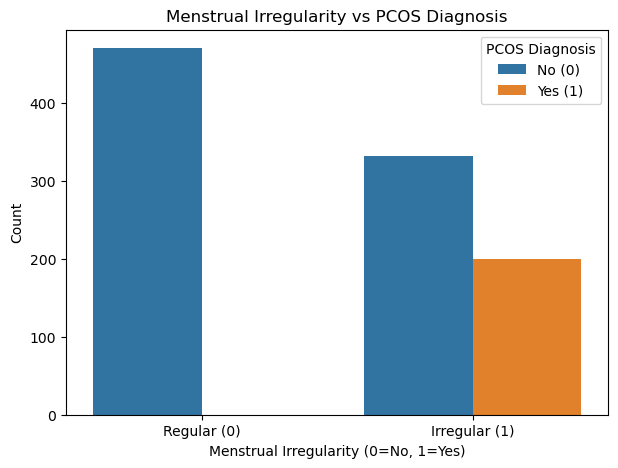

In [131]:
# Visualization 6: Menstrual Irregularity vs PCOS Diagnosis
plt.figure(figsize=(7, 5))
sns.countplot(x='Menstrual_Irregularity', hue='PCOS_Diagnosis', data=dataset)
plt.title('Menstrual Irregularity vs PCOS Diagnosis')
plt.xlabel('Menstrual Irregularity (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Regular (0)', 'Irregular (1)'])
plt.legend(title='PCOS Diagnosis', labels=['No (0)', 'Yes (1)'])
plt.show()

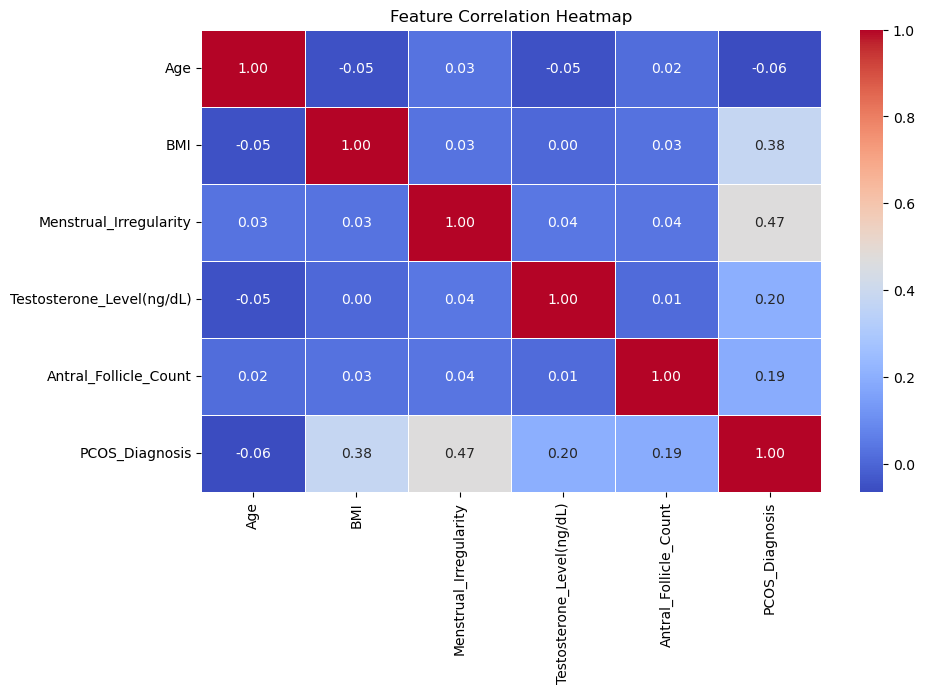

In [133]:
# Visualization 7: Correlation Heatmap (Original - Keep)
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

### Data Splitting

In [136]:
# Define features (X) and target (y)
features = ['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']
target = 'PCOS_Diagnosis'

X = dataset[features]
y = dataset[target]

# Split the data into training (70%) and testing (30%) sets
# Use random_state for reproducibility
# Stratify ensures proportion of target classes is similar in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [140]:
# Print the shapes of the resulting datasets
print("--- Data Splitting ---\n")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape,"\n")
print("Data splitting complete.")

--- Data Splitting ---

Shape of X_train: (700, 5)
Shape of X_test: (300, 5)
Shape of y_train: (700,)
Shape of y_test: (300,) 

Data splitting complete.


In [142]:
X_train

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count
110,45,25.2,1,92.6,10
354,37,22.6,0,51.2,12
868,31,29.6,0,94.6,24
18,39,18.7,0,51.7,14
352,23,26.9,1,43.1,26
...,...,...,...,...,...
362,35,32.1,0,86.7,21
166,40,27.2,1,86.5,28
68,45,26.5,1,86.3,7
600,30,23.8,0,86.8,17


In [234]:
X_test

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count
874,32,33.8,1,75.6,5
755,25,21.4,1,99.5,23
237,37,18.9,1,53.7,15
807,38,34.5,1,84.9,24
245,20,23.9,1,85.7,19
...,...,...,...,...,...
586,43,26.6,0,72.1,24
820,32,20.8,1,81.2,24
413,45,24.1,0,60.9,20
684,37,19.2,1,96.6,18


### Baseline Model

In [151]:
#Baseline Model for comparing and reference
print("Baseline Decision Tree Model\n")
# Training the model
BaselineModel = DecisionTreeClassifier(random_state=42)
BaselineModel.fit(X_train, y_train)

Baseline Decision Tree Model



DecisionTreeClassifier(random_state=42)

In [221]:
# Making predictions
y_pred_baseline = BaselineModel.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [275]:
# Display the first few predictions and actual values for comparison (optional)
print("\nSample Predictions vs Actual Values:")
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
print(comparison_df)


Sample Predictions vs Actual Values:
     Actual  Predicted
874       0          0
755       0          0
237       0          0
807       1          1
245       0          0
..      ...        ...
586       0          0
820       0          0
413       0          0
684       0          0
269       0          0

[300 rows x 2 columns]


In [260]:
# Evaluate Baseline Model
print("--- Baseline Model Evaluation ---\n")
evaluate_model(y_test,y_pred_baseline)

--- Baseline Model Evaluation ---

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


Confusion Matrix:

[[240   0]
 [  0  60]]


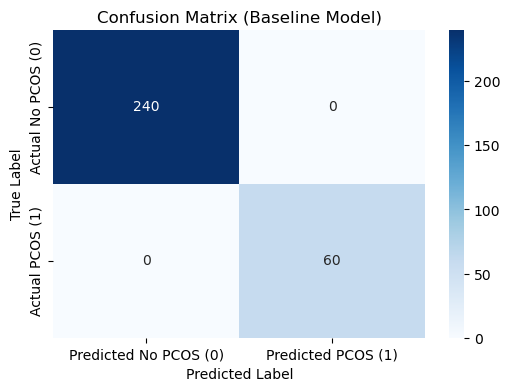


Classification Report:
              precision    recall  f1-score   support

 No PCOS (0)       1.00      1.00      1.00       240
    PCOS (1)       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [155]:
print("Confusion Matrix:\n")
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(cm_baseline)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No PCOS (0)', 'Predicted PCOS (1)'],
            yticklabels=['Actual No PCOS (0)', 'Actual PCOS (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Baseline Model)")
plt.show()

print("\nClassification Report:")
report_baseline = classification_report(y_test, y_pred_baseline, target_names=['No PCOS (0)', 'PCOS (1)'])
print(report_baseline)

### Pre-Pruned Decision Tree Model

In [161]:
# Setting max_depth before training
print("--- Pre-Pruned Decision Tree Model (max_depth=5) ---\n")

PrunedModel = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=100) # Example pre-pruning
PrunedModel.fit(X_train, y_train)

--- Pre-Pruned Decision Tree Model (max_depth=5) ---



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)

In [264]:
# Making predictions
y_pred_pruned = PrunedModel.predict(X_test)

# Evaluate Pre-Pruned Model
print("Pre-Pruned Model Evaluation\n")
evaluate_model(y_test,y_pred_pruned)

Pre-Pruned Model Evaluation

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


Confusion Matrix (Pre-Pruned Model):

[[240   0]
 [  0  60]]


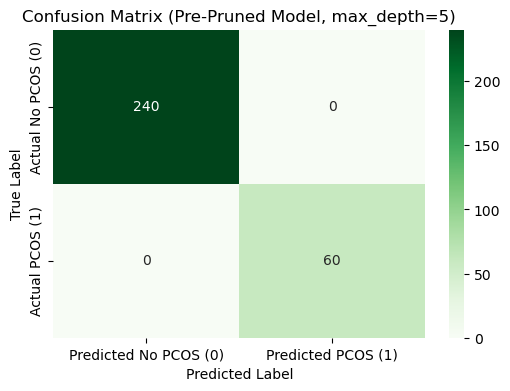


Classification Report (Pre-Pruned Model):
              precision    recall  f1-score   support

 No PCOS (0)       1.00      1.00      1.00       240
    PCOS (1)       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [167]:
# Printing the confusion matrix for the pre-pruned model
print("Confusion Matrix (Pre-Pruned Model):\n")
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
print(cm_pruned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_pruned, annot=True, fmt='d', cmap='Greens', # Different color map
            xticklabels=['Predicted No PCOS (0)', 'Predicted PCOS (1)'],
            yticklabels=['Actual No PCOS (0)', 'Actual PCOS (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Pre-Pruned Model, max_depth=5)")
plt.show()

print("\nClassification Report (Pre-Pruned Model):")
report_pruned = classification_report(y_test, y_pred_pruned, target_names=['No PCOS (0)', 'PCOS (1)'])
print(report_pruned)

<Figure size 1800x1000 with 0 Axes>

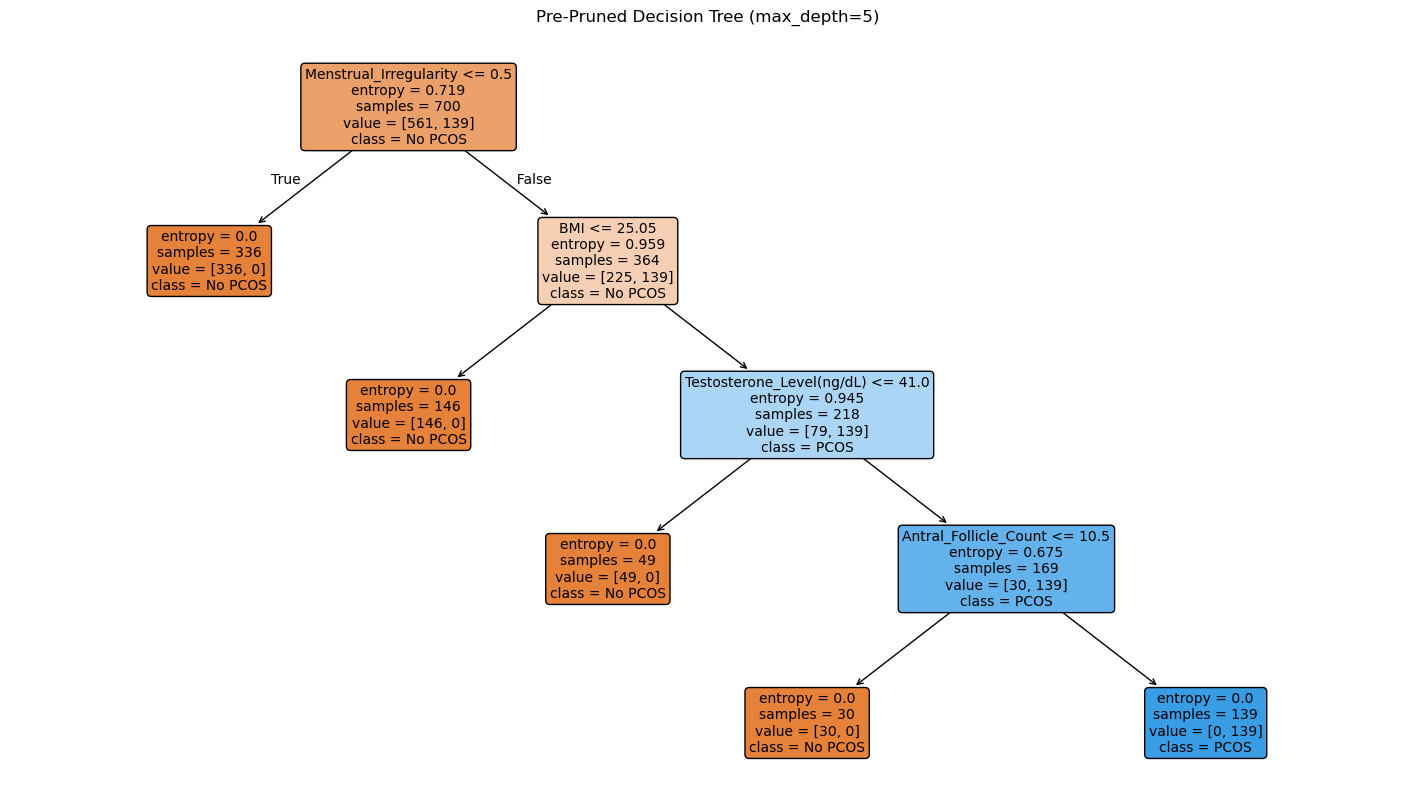

In [173]:
# Visualize the pruned tree
from sklearn import tree
plt.figure(figsize=(18,10)) # Adjusted size
tree.plot_tree(PrunedModel, filled=True, feature_names=features, class_names=['No PCOS','PCOS'], rounded=True, fontsize=10)
plt.title("Pre-Pruned Decision Tree (max_depth=5)")
plt.show()

### Hyperparameter Tuning using GridSearchCV

In [277]:
from sklearn.model_selection import GridSearchCV
print("--- Hyperparameter Tuning with GridSearchCV ---\n")

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None], # None means no limit
    'min_samples_split': [2, 5, 10, 15], # The minimum number of samples required in a node before it can be split further.
    'min_samples_leaf': [1, 3, 5, 7] # The minimum number of samples required to be in each leaf node that results after a split.
}
# Create a Decision Tree Classifier instance
dtree = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
# cv=5 means 5-fold cross-validation
# scoring='f1_weighted' considers class imbalance better than pure accuracy
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                           cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1) # n_jobs=-1 uses all processors, verbose shows progress
# Fit GridSearchCV to the training data
print("Starting GridSearchCV fitting...\n")
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting complete.")

# Get the best parameters and the best score
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("\nBest F1-Weighted Score on CV:", grid_search.best_score_)

# Get the best estimator (the model with the best parameters)
BestTunedModel = grid_search.best_estimator_

--- Hyperparameter Tuning with GridSearchCV ---

Starting GridSearchCV fitting...

Fitting 5 folds for each of 160 candidates, totalling 800 fits
GridSearchCV fitting complete.

Best Parameters found by GridSearchCV:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best F1-Weighted Score on CV: 0.9985616161616161


### Evaluation of the Tuned Model

In [279]:
print("--- Tuned Model Evaluation (Using Best Estimator from GridSearchCV) ---\n")

# Making predictions with the best tuned model
y_pred_tuned = BestTunedModel.predict(X_test)

# Evaluate the Tuned Model
evaluate_model(y_test,y_pred_tuned)

--- Tuned Model Evaluation (Using Best Estimator from GridSearchCV) ---

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


Confusion Matrix (Tuned Model):

[[240   0]
 [  0  60]]


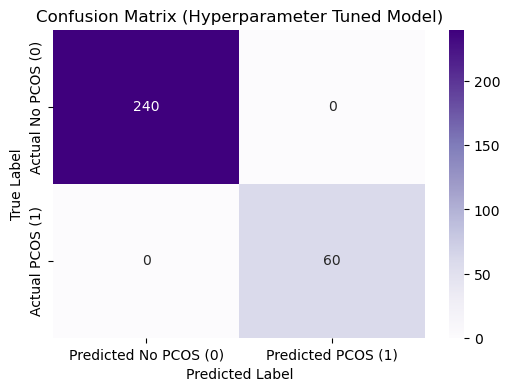


Classification Report (Tuned Model):
              precision    recall  f1-score   support

 No PCOS (0)       1.00      1.00      1.00       240
    PCOS (1)       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [280]:
# Confusion Matrix for Tuned Model
print("Confusion Matrix (Tuned Model):\n")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cm_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Purples', # Different color map
            xticklabels=['Predicted No PCOS (0)', 'Predicted PCOS (1)'],
            yticklabels=['Actual No PCOS (0)', 'Actual PCOS (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Hyperparameter Tuned Model)")
plt.show()

print("\nClassification Report (Tuned Model):")
report_tuned = classification_report(y_test, y_pred_tuned, target_names=['No PCOS (0)', 'PCOS (1)'])
print(report_tuned)

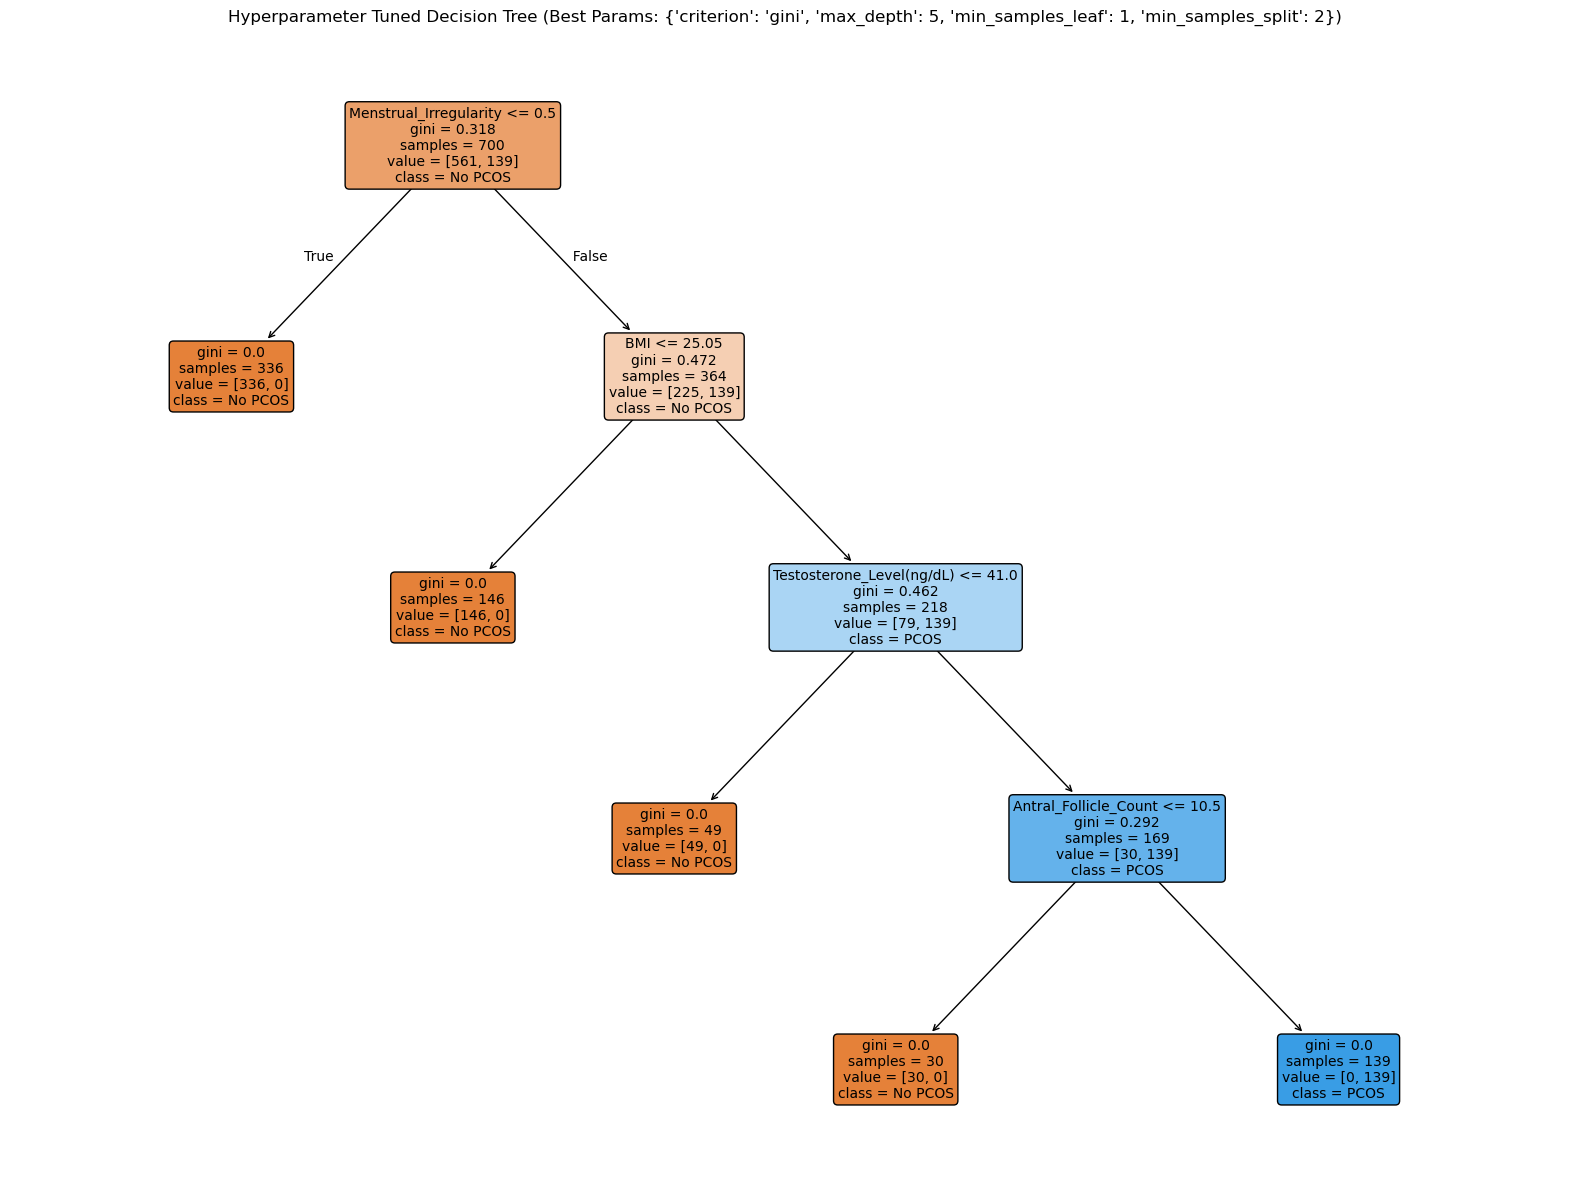

In [281]:
# Visualize the final tuned tree
tuned_depth = BestTunedModel.get_params()['max_depth']
if tuned_depth is None or tuned_depth <= 7: # Only plot if not too deep
    plt.figure(figsize=(20,15))
    plot_tree(BestTunedModel, filled=True, feature_names=features, class_names=['No PCOS','PCOS'], rounded=True, fontsize=10)
    plt.title(f"Hyperparameter Tuned Decision Tree (Best Params: {grid_search.best_params_})")
    plt.show()
else:
    print("\nBest tuned tree is too deep to visualize effectively.")

### Comparison of Models

In [283]:
print("--- Model Comparison ---")

print("\nBaseline Model Classification Report:")
print(report_baseline)

--- Model Comparison ---

Baseline Model Classification Report:
              precision    recall  f1-score   support

 No PCOS (0)       1.00      1.00      1.00       240
    PCOS (1)       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [284]:
print("Pre-Pruned Model (max_depth=5) Classification Report:\n")
print(report_pruned)

Pre-Pruned Model (max_depth=5) Classification Report:

              precision    recall  f1-score   support

 No PCOS (0)       1.00      1.00      1.00       240
    PCOS (1)       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [285]:
print("Hyperparameter Tuned Model Classification Report:\n")
print(report_tuned)

Hyperparameter Tuned Model Classification Report:

              precision    recall  f1-score   support

 No PCOS (0)       1.00      1.00      1.00       240
    PCOS (1)       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [293]:
print("--- Summary of Accuracy ---\n")
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")
print(f"Pre-Pruned Model Accuracy: {accuracy_pruned:.4f}")
print(f"Tuned Model Accuracy:    {accuracy_tuned:.4f}")

--- Summary of Accuracy ---

Baseline Model Accuracy: 1.0000
Pre-Pruned Model Accuracy: 1.0000
Tuned Model Accuracy:    1.0000


## <span style="color:purple">6. Overall Analysis:</span>

* The evaluation results show identical and perfect performance across the Baseline, Pre-Pruned (max_depth=5), and Hyperparameter Tuned models.
* All achieved 100% accuracy, precision, recall, and F1-score for both PCOS and non-PCOS classes on the test set, indicating zero misclassifications.
* The unpruned baseline, the simpler pruned model, and the model optimized via GridSearchCV all learned patterns that perfectly separated the classes in the test data.
* The underlying patterns might be very distinct, or the test set might not contain particularly challenging or borderline cases.

## <span style="color:purple">7. Conclusion</span>

Since all models perform identically and flawlessly based on these metrics, secondary criteria like simplicity become relevant. The Pre-Pruned model achieves perfect results with a constrained complexity (max_depth=5), making it more interpretable and potentially less prone to overfitting than the unrestricted Baseline. The Tuned model also performed perfectly. Therefore, the tuned model is the recommended choice, offering perfect predictive power with better interpretability and efficiency.